In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import random
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('tic-tac-toe-endgame.csv')
cl = df["V10"].unique()

x=df.drop("V10", axis=1)
y = df["V10"]

x = x.apply(preprocessing.LabelEncoder().fit_transform)
le= preprocessing.LabelEncoder()
y = le.fit_transform(y)

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.29,random_state=0)

clf = DecisionTreeClassifier(criterion='entropy', max_depth=9, min_impurity_decrease=0.0, min_samples_leaf=1, class_weight="balanced", splitter='best')

clf = clf.fit(x_train, y_train)

result = clf.score(x_train,y_train)
print("score for train set:",result)
result1 = clf.score(x_test,y_test)
print("score for test set:",result1)

board = np.array([1,1,2,0,0,2,2,0,1])
#X=1 and O=2
#values_filled = (board == 0).sum()
#print(values_filled)
    
df_possibilities = x.loc[
x['V1'].apply(lambda x: range(0,8) if board[0]==0 else x==board[0])&
x['V2'].apply(lambda x: range(0,8) if board[1]==0 else x==board[1])&
x['V3'].apply(lambda x: range(0,8) if board[2]==0 else x==board[2])&
x['V4'].apply(lambda x: range(0,8) if board[3]==0 else x==board[3])&
x['V5'].apply(lambda x: range(0,8) if board[4]==0 else x==board[4])&
x['V6'].apply(lambda x: range(0,8) if board[5]==0 else x==board[5])&
x['V7'].apply(lambda x: range(0,8) if board[6]==0 else x==board[6])&
x['V8'].apply(lambda x: range(0,8) if board[7]==0 else x==board[7])&
x['V9'].apply(lambda x: range(0,8) if board[8]==0 else x==board[8])
]

                              
df_possibilities = df_possibilities.reset_index(drop=True)
prediction = clf.predict(df_possibilities)
prediction = pd.DataFrame(prediction)
prediction.columns = ["prediction"]
df_possibilities_pred = pd.concat([df_possibilities,prediction],axis=1)

df_win = df_possibilities_pred.loc[df_possibilities_pred['prediction'] == 1] #POSITIVES
df_lose = df_possibilities_pred.loc[df_possibilities_pred['prediction'] == 0] #NEGATIVES
    
empty = []
filled = []
a = board.tolist()
for i in range(len(a)):
    if a[i] == 0:
        empty.append(i)
    elif a[i] != 0:
        filled.append(i)
        
def getlistnum(li):
    li = list(li)
    set1 = set(li)
    dict1 = {}
    for item in set1:
        dict1.update({item:li.count(item)})
    return dict1

winning_pos = []
losing_pos = []  
    
if a.count(2) >= a.count(1): 
    for i in empty:
        winning = getlistnum(df_win.iloc[:,i]).get(2,0)/len(df_win)
        losing = getlistnum(df_lose.iloc[:,i]).get(2,0)/len(df_lose)
        winning_pos.append(winning)
        losing_pos.append(losing)
    #Generate a random number and assign it to randInt
        
    
com = pd.concat([pd.DataFrame(winning_pos),pd.DataFrame(losing_pos)],axis=1)
com.columns = ["winning","losing"]
com["win"] = np.where(com["winning"]>com["losing"],1,0)
best_move_index = com.loc[com["win"]==1]["winning"].idxmax()
predicted_position = empty[best_move_index]
print (predicted_position)

score for train set: 0.9838945827232797
score for test set: 0.9354838709677419
4


In [6]:
print(clf)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=9, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')


In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn import metrics
 
cm = clf.predict(x_test)
print("Accuracy: {0:.1f}%".format(metrics.accuracy_score(y_test,cm) * 100))

Accuracy: 94.3%


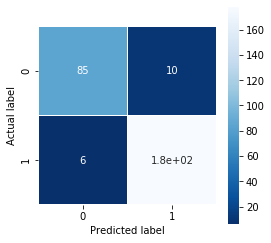

In [22]:
plt.figure(figsize=(4,4))
sns.heatmap(metrics.confusion_matrix(y_test,cm), annot=True, linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.show()